# MSA 2025 Phase 2 - Part 1

In [148]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [149]:
#I will be using X store sales
#reading the file
df = pd.read_csv("datasets/X store sales/store_sales.csv", encoding='latin1')
df.head(1)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


In [150]:
#data type of each column
df = df.convert_dtypes()
df.dtypes

Row ID                    Int64
Order ID         string[python]
Order Date       string[python]
Ship Date        string[python]
Ship Mode        string[python]
Customer ID      string[python]
Customer Name    string[python]
Segment          string[python]
Country          string[python]
City             string[python]
State            string[python]
Postal Code               Int64
Region           string[python]
Product ID       string[python]
Category         string[python]
Sub-Category     string[python]
Product Name     string[python]
Sales                   Float64
Quantity                  Int64
Discount                Float64
Profit                  Float64
dtype: object

In [ ]:
#the number of rows in my data
print(df.shape[0])

2121


In [152]:
# We want useful infomation about sales such as mean, median and standard deviation

sales = df['Sales']
print(f"Sales price standard diviation: {sales.std()}")
print(f"Mean sales price: {sales.mean()}")
print(f"Sales price median price: {df['Sales'].median()}")

# Because the mean is so much higher than the median, we can assume that there are some outliers in the data.
# and that means that the data is not normally distributed or has some extreme outliers for higher sales.

Sales price standard diviation: 503.1791448146309
Mean sales price: 349.8348869872702
Sales price median price: 182.22


In [153]:
# We want to know how many customers we have and how many orders each customer has made
# We can use groupby to group by 'Customer ID' and count the number of unique to get the number of orders per customer
# We can also get the mean, standard deviation and median of the number of orders per customer

orders_per_customer = df.groupby('Customer ID')['Order ID'].nunique()
print(f"Total number of customers: {df['Customer ID'].nunique()}")
print(f"Mean number of orders per customer: {orders_per_customer.mean()}")
print(f"Total number of orders per customer standard deviation: {orders_per_customer.std()}")
print(f"Total number of orders per customer median: {orders_per_customer.median()}")

# we can see the mean is higher than the median 
# this is expected as there is a floor of 1 order per customer, but there is no ceiling
# and the median is very close to the floor of 1 order per customer

Total number of customers: 707
Mean number of orders per customer: 2.495049504950495
Total number of orders per customer standard deviation: 1.3687801237930184
Total number of orders per customer median: 2.0


In [154]:
# We want useful infomation about profit such as mean, median and standard deviation

profit = df["Profit"]
print(f"Profit standard deviation: {profit.std()}")
print(f"Mean profit: {profit.mean()}")
print(f"Profit median: {df['Profit'].median()}")

# Profit is the amount of money made from each order, the Standard deviation is high, meaning there are alot outliers in the data.
# This is to be expected as there may be loss leaders in the data, which will skew the data down as well as
# luxury items which will skew the data up.

Profit standard deviation: 136.04924643905227
Mean profit: 8.699327109853845
Profit median: 7.7748


In [155]:
# We want useful infomation about quantity such as mean, median and standard deviation
# Quantity is the number of items sold in each order

term = "Quantity"
table = df[term]
print(f"{term} standard deviation: {table.std()}")
print(f"Mean {term}: {table.mean()}")
print(f"{term} median: {df['Quantity'].median()}")

Quantity standard deviation: 2.2516202996967682
Mean Quantity: 3.785007072135785
Quantity median: 3.0


In [156]:
# We want useful infomation about discount such as mean, median and standard deviation
# Discount is the amount of discount applied to each order as a percentage of the total order value

term = "Discount"
table = df[term]
print(f"{term} standard deviation: {table.std()}")
print(f"Mean {term}: {table.mean()}")
print(f"{term} median: {df['Discount'].median()}")

Discount standard deviation: 0.18154728491496322
Mean Discount: 0.1739226779820839
Discount median: 0.2


In [157]:
# Country is the region where the order was made
# We can see that the only country in the data is the United States.

country = df["Country"]
print(f"Regions : {country.unique()}")

Regions : <StringArray>
['United States']
Length: 1, dtype: string


In [158]:
# We want to know how many cities we have in the data

cities = df["City"]
print(f"Number of Cities : {cities.nunique()}")


Number of Cities : 371


In [159]:
# We want to know how many regions we have in the data
# Because htis is low we also want to know the unique regions

region = df["Region"]
print(f"Regions : {region.unique()}")

Regions : <StringArray>
['South', 'West', 'East', 'Central']
Length: 4, dtype: string


In [160]:
# We want to know how many Segments we have in the data
# Because htis is low we also want to know the unique segments

segment = df["Segment"]
print(f"Segments : {segment.unique()}")

Segments : <StringArray>
['Consumer', 'Corporate', 'Home Office']
Length: 3, dtype: string


In [161]:
# We want to know how many Ship Modes we have in the data
# Because htis is low we also want to know the unique ship modes

ship_mode = df["Ship Mode"]
print(f"Ship Modes : {ship_mode.unique()}")


Ship Modes : <StringArray>
['Second Class', 'Standard Class', 'First Class', 'Same Day']
Length: 4, dtype: string


In [162]:
# We want to know how many unique products we have in the data
# We can use the 'Product ID' column to get the number of unique products

product_id = df["Product ID"]
print(f"Product IDs : {product_id.nunique()}")
print(f"Most ordered product (by individual orders): {max(df['Product ID'].value_counts())}")

Product IDs : 375
Most ordered product (by individual orders): 16


In [163]:
# We want to know how many unique post codes we have in the data
# We can use the 'Postal Code' column to get the number of unique post codes

post_code = df["Postal Code"]
print(f"Number of unique post codes: {post_code.nunique()}")
print(f"Most used post code: {max(df['Postal Code'].value_counts())}")

#Number of customers vs number of postal codes
customers = df["Customer ID"]
print(f"Number of unique customers: {customers.nunique()}")

#We can see that each postal code is not unique to a customer, as there are more customers than postal codes.
#This means that customers can share postal codes.

Number of unique post codes: 454
Most used post code: 59
Number of unique customers: 707


In [164]:
# we want to know how many unique states we have in the data
# We can use the 'State' column to get the number of unique states

state = df["State"]
#print(f"States : {state.unique()}")
print(f"Number of unique states: {state.nunique()}")

# We want to know the most and least used states in the data
most_used_state = df['State'].value_counts().idxmax()
print(f"Most used state: {most_used_state} (Count: {df['State'].value_counts().max()})")


Number of unique states: 48
Most used state: California (Count: 444)


In [165]:
# Plot Customer Names that appear with more than one unique Customer ID
name_id_counts = df.groupby('Customer Name')['Customer ID'].nunique()
multiple_ids = name_id_counts[name_id_counts > 1]
print(f"Customer Names with multiple IDs: {len(multiple_ids)}")

# we can see that there are no customers that share names in the data
# This means that the 'Customer Name' column is unique to each customer.

Customer Names with multiple IDs: 0


In [166]:
#Nothing needed for Row ID
#Nothing needed for Customer Name as it maps to Customer ID
#Nothing needed for Product Name as it maps to Product ID

In [167]:
missing_data = df.isnull().sum().to_frame()

# Rename column holding the sums
missing_data = missing_data.rename(columns={0:'Empty Cells'})

# Print the results
print(missing_data)

# we can see that there are no missing values in the data

               Empty Cells
Row ID                   0
Order ID                 0
Order Date               0
Ship Date                0
Ship Mode                0
Customer ID              0
Customer Name            0
Segment                  0
Country                  0
City                     0
State                    0
Postal Code              0
Region                   0
Product ID               0
Category                 0
Sub-Category             0
Product Name             0
Sales                    0
Quantity                 0
Discount                 0
Profit                   0


## 2. Visualize data


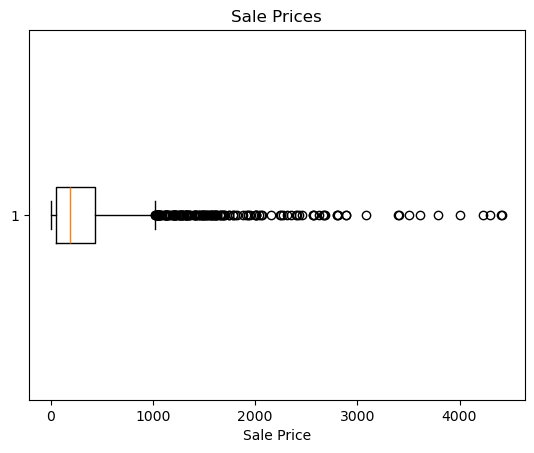

In [168]:
#plotting sales
sales = df["Sales"]

# we want to get a boxplot of the sales data to see the distribution and outliers
plt.boxplot(sales, vert= False)
plt.title("Sale Prices")
plt.xlabel("Sale Price")
plt.show()

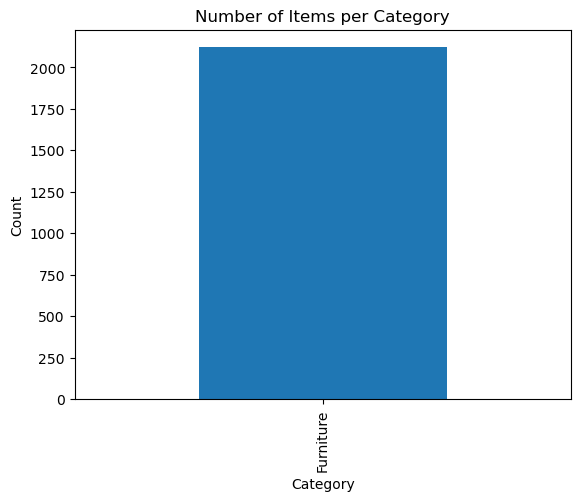

In [169]:
# We want to know the distribution of sales across different categories
# However the graph shows that there is only one category in the data

categories = df['Category'].value_counts()
categories.plot(kind='bar')

plt.title("Number of Items per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

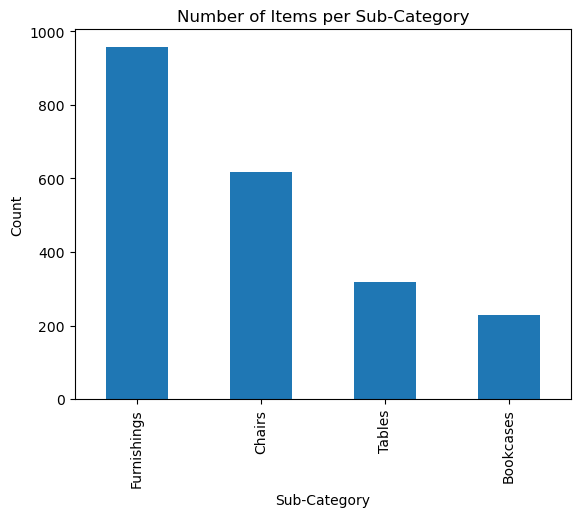

In [170]:
# We want to know the distribution of sales across different sub-categories
# We can see that there are multiple sub-categories in the data and furnishings is the most common sub-category
# We can also see that the sub-categories are not evenly distributed, with some having significantly more items than others

categories = df['Sub-Category'].value_counts()
categories.plot(kind='bar')

plt.title("Number of Items per Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Count")
plt.show()


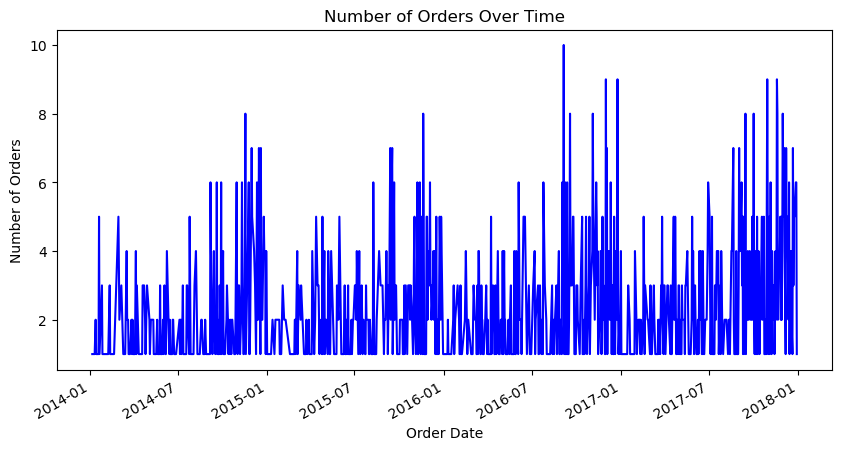

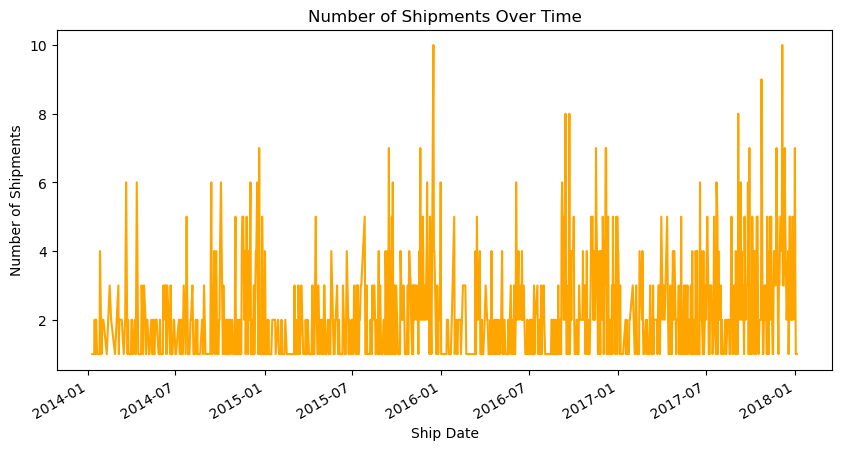

In [171]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])


# Convert 'Ship Date' to datetime
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Group by date and count orders
orders_per_day = df.groupby('Order Date').size()
shipments_per_day = df.groupby('Ship Date').size()

# Plot
orders_per_day.plot(kind='line', figsize=(10,5), color='blue')
plt.title('Number of Orders Over Time')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.show()

shipments_per_day.plot(kind='line', figsize=(10,5), color='orange')
plt.title('Number of Shipments Over Time')  
plt.xlabel('Ship Date')
plt.ylabel('Number of Shipments')
plt.show()

# We can see that the number of orders and shipments is generally increasing over time, with some very large fluctuations.
# We can also see that most years have more orders at the end of the year than the start of the year.
# This could be due to seasonal trends, such as holidays or sales events, which drive more orders and shipments towards the end of the year.


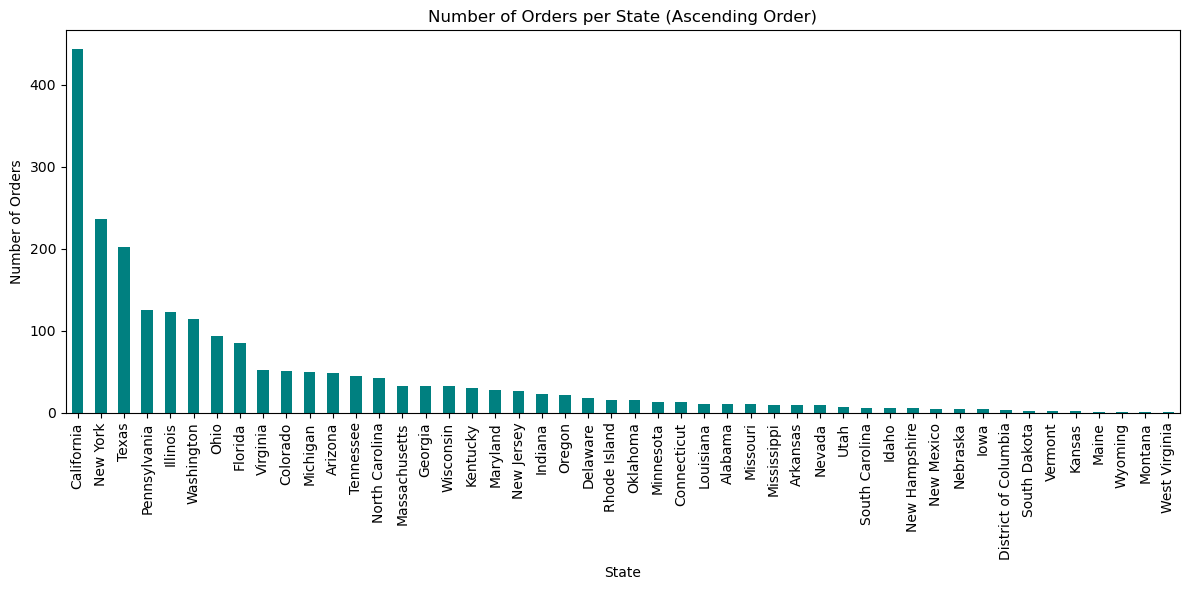

In [172]:
# Number of orders per state (ascending order)
orders_per_state = df['State'].value_counts(ascending=False)
orders_per_state.plot(kind='bar', figsize=(12,6), color='teal')
plt.title('Number of Orders per State (Ascending Order)')
plt.ylabel('Number of Orders')
plt.xlabel('State')
plt.tight_layout()
plt.show()

# We can see that the most orders are in California, New York and Texas.
# This is expected as these states have the largest populations in the US.
# but we can also see that the drop off is disproportianate to population size as the drop off is steeper than expected.

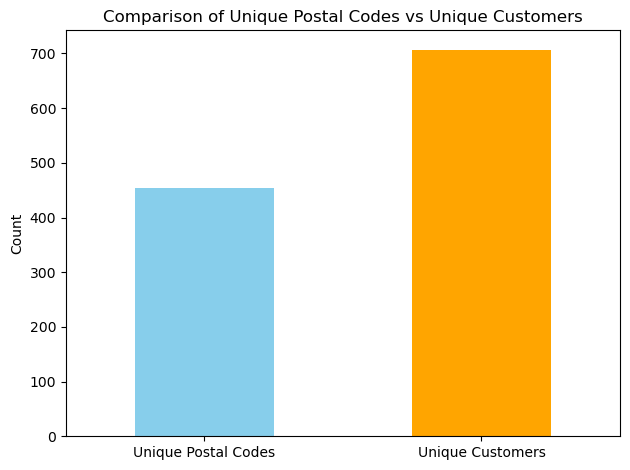

In [173]:
# Compare number of unique postal codes and unique customers
unique_counts = pd.Series({
    'Unique Postal Codes': df['Postal Code'].nunique(),
    'Unique Customers': df['Customer ID'].nunique()
})
#bar plot for unique postal codes and unique customers
unique_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Comparison of Unique Postal Codes vs Unique Customers')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

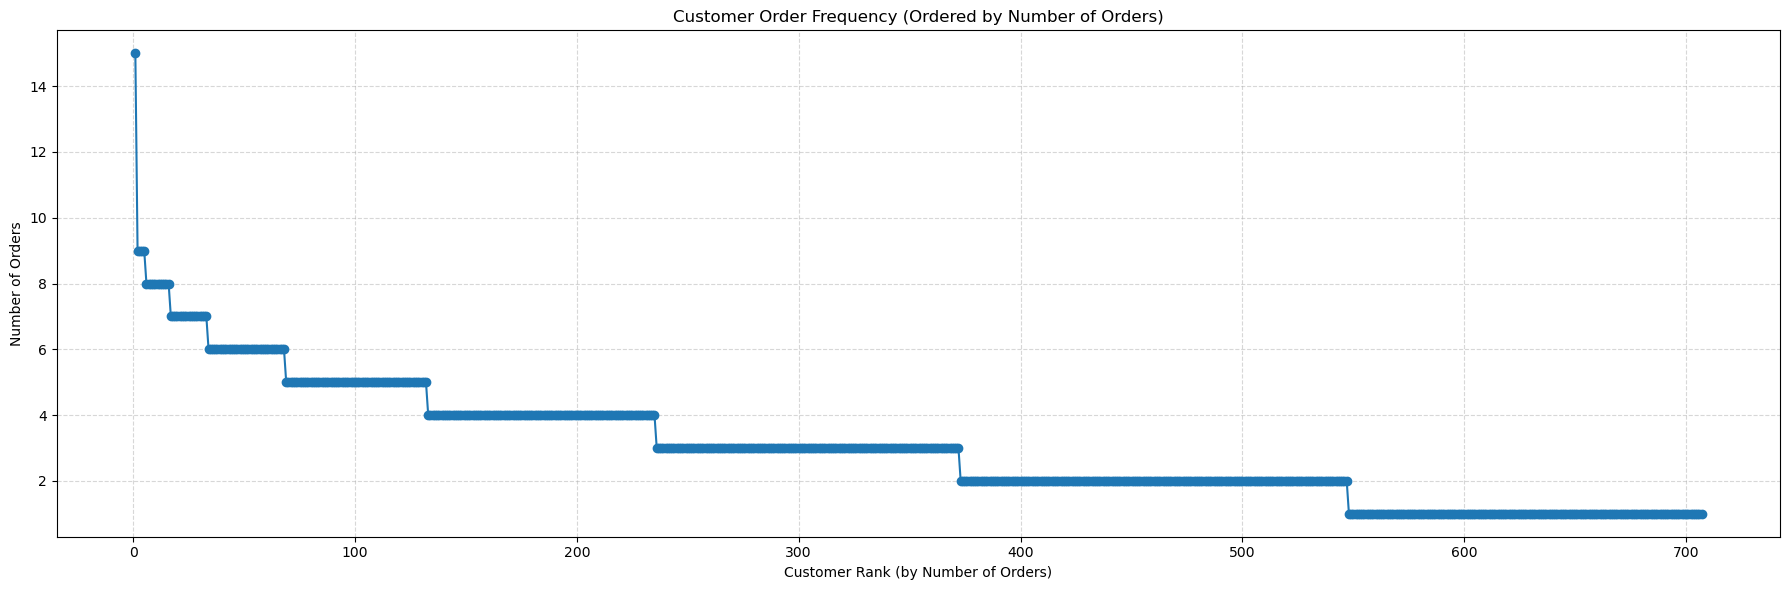

In [174]:
# Plot ordered list of customer IDs vs number of customer orders
orders_per_customer = df['Customer ID'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(18,6))
# We have ordered the customers by the number of orders they have made
# This allows us to see the most frequent customers at the top of the graph
# however we need to add range for the x-axis to show the rank of each customer
plt.plot(range(1, len(orders_per_customer)+1), orders_per_customer.values, marker='o', linestyle='-')
plt.title('Customer Order Frequency (Ordered by Number of Orders)')
plt.xlabel('Customer Rank (by Number of Orders)')
plt.ylabel('Number of Orders')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



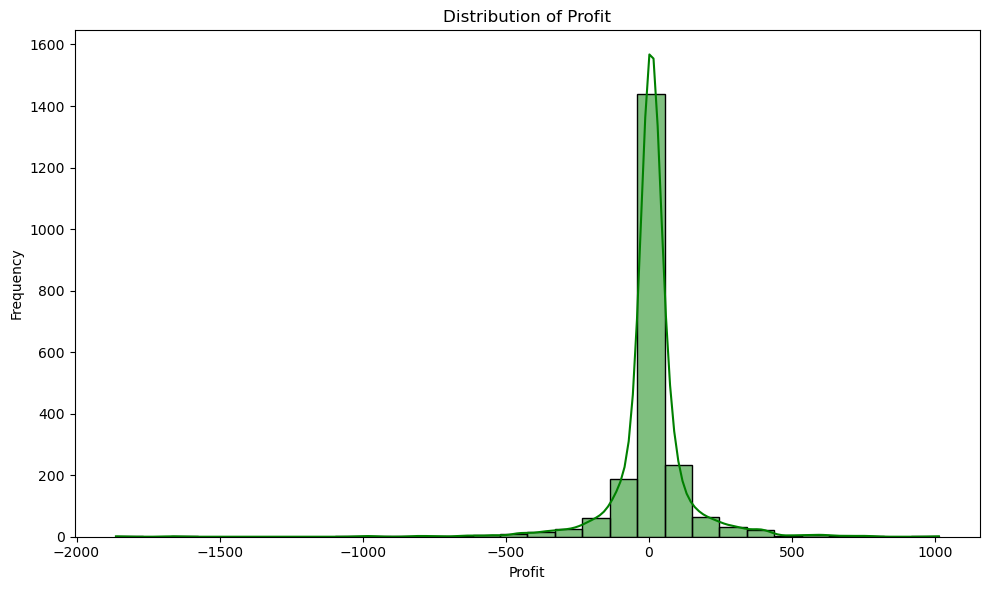

In [175]:
# This plot shows the distribution of profit across all orders
# We can see that the profit is generally positive, with some orders having very high profits
# We can also see some extreme outliers in the profit data.
plt.figure(figsize=(10,6))
sns.histplot(df['Profit'], bins=30, kde=True, color='green')
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

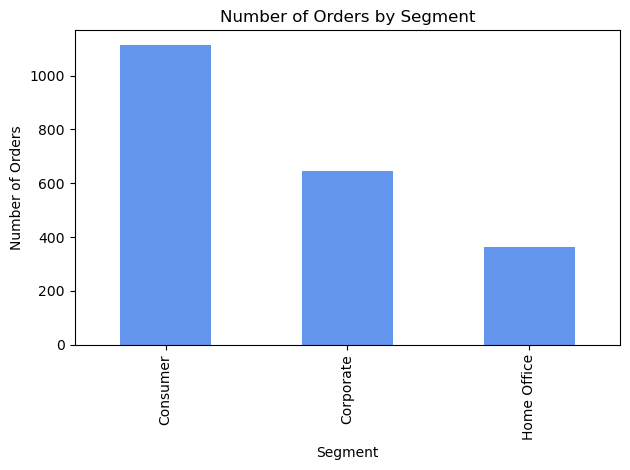

In [176]:
# Orders divided by Segment
df['Segment'].value_counts().plot(kind='bar', color='cornflowerblue')
plt.title('Number of Orders by Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()





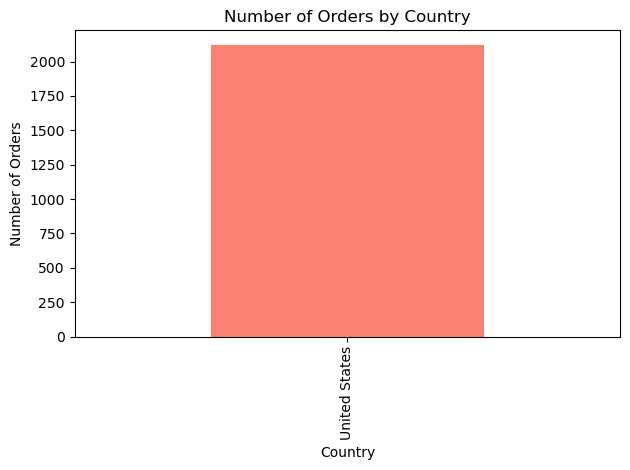

In [177]:
# Orders divided by Country
df['Country'].value_counts().plot(kind='bar', color='salmon')
plt.title('Number of Orders by Country')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

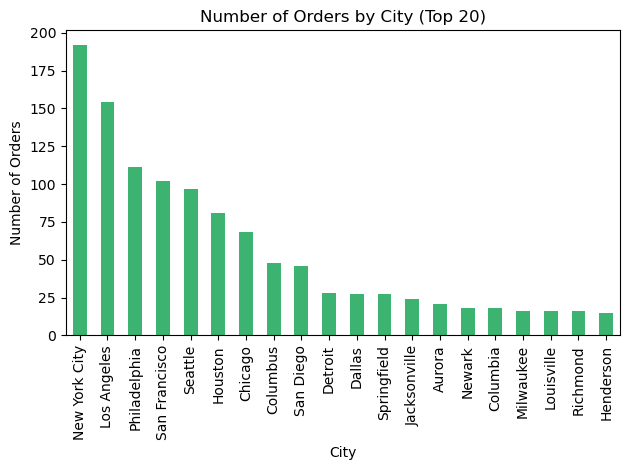

In [178]:
# Orders divided by City (top 20 cities for readability)
# we dont need all cities as there are too many to show
# However we want to see the shape of the data
df['City'].value_counts().head(20).plot(kind='bar', color='mediumseagreen')
plt.title('Number of Orders by City (Top 20)')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

## 3. Clean Data

In [179]:
#This reloads the data so that i can easly regain the original data
df = pd.read_csv("datasets/X store sales/store_sales.csv", encoding='latin1')

### 3.1 Removing Non-Significant Features

In [180]:
# Row ID is a unique identifier for each row and does not provide any additional information for analysis.
#We already have a unique identifier in the 'Order ID' column, so we can drop 'Row ID'.
if 'Row ID' in df.columns:
    df = df.drop('Row ID', axis=1)

#Country is not needed as all data is from the same country the USA we will save if to another variable in case we need it later
if 'Country' in df.columns:
    country = df['Country'].unique()
    df = df.drop('Country', axis=1)

#Same as Country, Category is not needed as all data is from the same category we will save if to another variable in case we need it later
if 'Category' in df.columns:
    categories = df['Category'].unique()
    df = df.drop('Category', axis=1)

# Customer Name is not needed as it is just a mapping to Customer ID, we will save it to another variable in case we need it later
if 'Customer Name' in df.columns:
    customer_names = df[['Customer ID', 'Customer Name']]
    df = df.drop('Customer Name', axis=1)

# Like Customer Name, Product Name is just a mapping to Product ID, we will save it to another variable in case we need it later
if 'Product Name' in df.columns:
    product_names = df[['Product ID', 'Product Name']]
    df = df.drop('Product Name', axis=1)

# Postal code is not needed as it shows the location of the customer, however this is already represented by the 'State' and 'City' columns.
# In addition, postal codes are very specific, but are not ordered in any way that would be useful for analysis.
# Thus, we will drop the 'Postal Code' column however we will save it to another variable in case we need it later.
if 'Postal Code' in df.columns:
    df_postal_code = df[['Order ID', 'Postal Code']]
    df = df.drop('Postal Code', axis=1)


# Order ID, Customer ID, and Product ID are unique identifiers for orders, customers, and products respectively.
# They are essential for tracking and analyzing sales data, so we will keep them in the dataset as Non-numeric columns.
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Sub-Category,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Bookcases,261.96,2,0.0,41.9136


### 3.2 Outlier Justification and Suggested Removals



In [181]:
# In the Visualistion we can see outliers in the Sales, and Profit columns.
# We will remove these outliers as they can skew the analysis and lead to misleading conclusions.

#percent we are removing 
percent_to_remove = 0.0025
# Removing outliers in Profit column
lower_profit = df['Profit'].quantile(percent_to_remove)
upper_profit = df['Profit'].quantile(1 - percent_to_remove)
df = df[(df['Profit'] >= lower_profit) & (df['Profit'] <= upper_profit)]
df.reset_index(drop=True, inplace=True)

# Removing outliers in Sales column
lower_sales = df['Sales'].quantile(percent_to_remove)
upper_sales = df['Sales'].quantile(1 - percent_to_remove)
df = df[(df['Sales'] >= lower_sales) & (df['Sales'] <= upper_sales)]
df.reset_index(drop=True, inplace=True)

df.head(1)


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Sub-Category,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Bookcases,261.96,2,0.0,41.9136


### 3.3 Converting To Numeric Data

In [182]:
# State has alot of unique values so hot-one encoding would not be useful
# Thus i decided to use frrequency encoding, which replaces each state with the number of times it appears in the dataset then Normalise it.
if 'State' in df.columns:
    state_counts = df['State'].value_counts()
    df['State'] = df['State'].map(state_counts)
    # Normalizing the state values
    df['State'] = (df['State'] - df['State'].min()) / (df['State'].max() - df['State'].min())

# Segment has only 3 unique values so we can use one-hot encoding
if 'Segment' in df.columns:
    df = pd.get_dummies(df, columns=['Segment'], dtype=int)

# Sub-Catagory has 4 unique values so we can use one-hot encoding
if 'Sub-Category' in df.columns:
    df = pd.get_dummies(df, columns=['Sub-Category'], dtype=int)

# City has a lot of unique values so we will use frequency encoding, then normalise it.
if 'City' in df.columns:
    city_counts = df['City'].value_counts()
    df['City'] = df['City'].map(city_counts)
    # Normalizing the city values
    df['City'] = (df['City'] - df['City'].min()) / (df['City'].max() - df['City'].min())

#Ship Mode has 4 unique values so we can use one-hot encoding
if 'Ship Mode' in df.columns:
    df = pd.get_dummies(df, columns=['Ship Mode'], dtype=int)

# Ship Date and Order Date are datetime columns, we will convert them to numeric values by extracting the year, month, and day.
#However all years are > 2015 so we will subtract 2015 from the year to make it easier to work with.
if 'Ship Date' in df.columns:
    df['Ship Date'] = pd.to_datetime(df['Ship Date'])
    df['Ship Year'] = df['Ship Date'].dt.year - 2015
    df['Ship Month'] = df['Ship Date'].dt.month
    df['Ship Day'] = df['Ship Date'].dt.day
    df.drop('Ship Date', axis=1, inplace=True)

# Order Date is also a datetime column, we will convert it to numeric values by extracting the year, month, and day.
# However all years are > 2015 so we will subtract 2015 from the year to make it easier to work with.
if 'Order Date' in df.columns:
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    df['Order Year'] = df['Order Date'].dt.year - 2015
    df['Order Month'] = df['Order Date'].dt.month
    df['Order Day'] = df['Order Date'].dt.day
    df.drop('Order Date', axis=1, inplace=True)

# Region has 4 unique values so we can use one-hot encoding
if 'Region' in df.columns:
    df = pd.get_dummies(df, columns=['Region'], dtype=int)

df.head(1)

,Order ID,Customer ID,City,State,Product ID,Sales,Quantity,Discount,Profit,Segment_Consumer,...,Ship Year,Ship Month,Ship Day,Order Year,Order Month,Order Day,Region_Central,Region_East,Region_South,Region_West
0,CA-2016-152156,CG-12520,0.068783,0.063492,FUR-BO-10001798,261.96,2,0.0,41.9136,1,...,1,11,11,1,11,8,0,0,1,0




## 4. Identify correlated variables

Correlation Matrix:
                              City     State     Sales  Quantity  Discount  \
City                      1.000000  0.459649  0.011582  0.005467 -0.057967   
State                     0.459649  1.000000 -0.001083  0.004224 -0.031756   
Sales                     0.011582 -0.001083  1.000000  0.423316 -0.034768   
Quantity                  0.005467  0.004224  0.423316  1.000000 -0.015926   
Discount                 -0.057967 -0.031756 -0.034768 -0.015926  1.000000   
Profit                    0.003340 -0.039279  0.297431  0.118936 -0.534745   
Segment_Consumer          0.011434  0.041841 -0.016696 -0.027729  0.016971   
Segment_Corporate         0.005043 -0.011511  0.021972  0.030734  0.001756   
Segment_Home Office      -0.021351 -0.041445 -0.004741 -0.000824 -0.024678   
Sub-Category_Bookcases    0.024729  0.029044  0.081064 -0.006505  0.069703   
Sub-Category_Chairs       0.014889  0.015624  0.266089  0.006954 -0.004487   
Sub-Category_Furnishings -0.033880 -0.037207

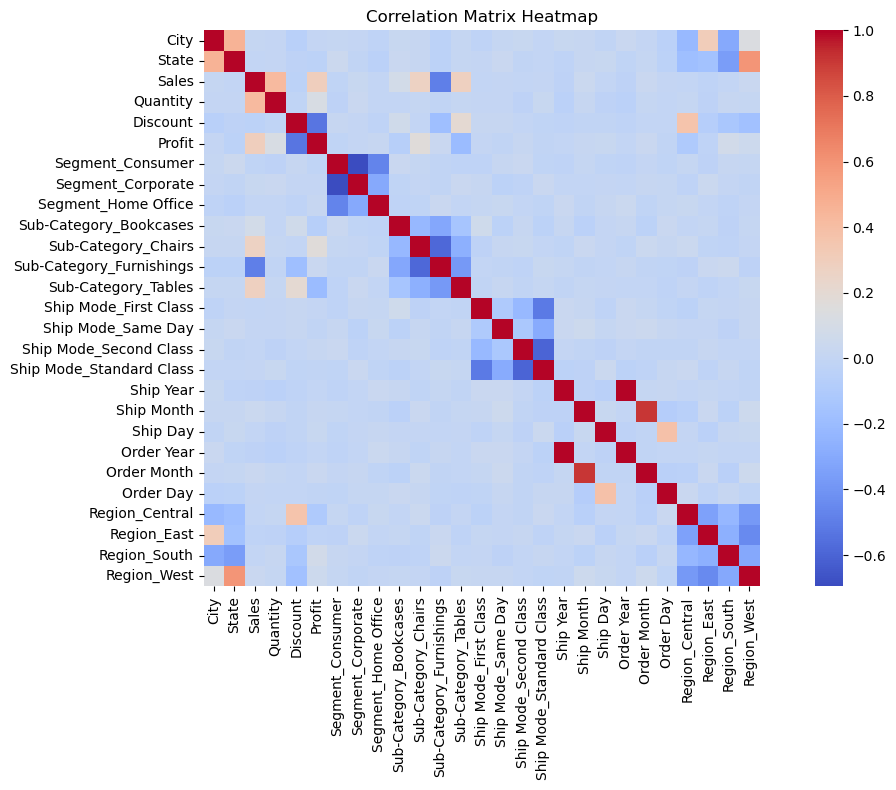

In [184]:
# Correlated variables

# Display correlation matrix and heatmap for all numeric columns
corr_matrix = df.corr(numeric_only=True)
print("Correlation Matrix:")
print(corr_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", square=True)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()


## 5. Summary


### Correlation Matrix Findings

After examining the correlation matrix and heatmap, several interesting relationships (and lack thereof) between variables can be observed:

- For example with our 1 hot encoded varables we can see negatively corralated 'boxes' this is expected as they are all mutealy exclusive, eg if something is in region_west it cant be in region_east.

- We also saw a strong corralation between ship and order dates, with the correlation getting worse the smaller the time frame, this is expected, as we can see from the ship day and order day correlations there is generally not much of a difference in the ship and order dates, so in order for there to be a difference in ship and orders month and year we would need to there to either be a large difference in order and shipment dates, or we would need the order time to be near the end of the month or year, which is less likely than not.

- for Quantity there was no correlation between it and discount, this was unexpected as i would have expected that people would buy things in bulk if they where on discount however this is not the case

- Interestingly we can see that furnishings are the least profitable sub catagory, this is expected as profits are not a percent of earning but a flat number, and because furnishings are the cheapest good they will obviously have the lowest profit numbers

- we can see a correlation between State and region west, this is likely because the american west cost has the highest concentration of population in a single state (California) thus if the region is the west then you can very confidently guess that the state is California whereas other regions have more even distributions of population across states

### Data Preproccessing 

Justification for preproccessing was in clean step